In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/chunks_info.csv')
print(len(df))
df.head()

10726


,chunk_id,sha,fileSize
0,776662,332b6ed4e324199565e235cd915368f9bc1b43d2,204.0
1,776782,b9e82842917f541594a67c44639201895caa4b28,251.0
2,776793,b9e82842917f541594a67c44639201895caa4b28,1001.0
3,776828,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,514.0
4,776863,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,782.0


In [3]:
df2 = pd.read_csv('data/partial_order_result.csv')
df2.head()

,chunk_id,partial_order,chunk_size,resolution_size
0,776662,True,18,12
1,776782,True,113,101
2,776793,True,6,5
3,776828,True,5,3
4,776863,True,6,5


In [4]:
df = pd.merge(df, df2, on = ['chunk_id'])

In [5]:
df3 = pd.read_csv('data/resolution_composition.csv')
df3.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [6]:
df = pd.merge(df, df3, on=['chunk_id'])
df.head()

,chunk_id,sha,fileSize,partial_order,chunk_size,resolution_size,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,332b6ed4e324199565e235cd915368f9bc1b43d2,204.0,True,18,12,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,b9e82842917f541594a67c44639201895caa4b28,251.0,True,113,101,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,b9e82842917f541594a67c44639201895caa4b28,1001.0,True,6,5,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,514.0,True,5,3,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,782.0,True,6,5,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [7]:
df['chunk_size'] = df['v1_size'] + df['v2_size']
df.head()

,chunk_id,sha,fileSize,partial_order,chunk_size,resolution_size,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,332b6ed4e324199565e235cd915368f9bc1b43d2,204.0,True,18,12,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,b9e82842917f541594a67c44639201895caa4b28,251.0,True,86,101,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,b9e82842917f541594a67c44639201895caa4b28,1001.0,True,5,5,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,bcd0ef81a0a8b9f64ea644e434d299585b4dbc75,514.0,True,5,3,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,30c4b21552ad0db4e3ed3fe8dfed3e702945851a,782.0,True,5,5,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [9]:
df = df[['chunk_id', 'fileSize', 'resolution_size', 'chunk_size' ]]
print(len(df))
df.head()

10726


,chunk_id,fileSize,resolution_size,chunk_size
0,776662,204.0,12,18
1,776782,251.0,101,86
2,776793,1001.0,5,5
3,776828,514.0,3,5
4,776863,782.0,5,5


## RQ2. What is the distribution in size of conflicting chunks and conflicting files as measured in lines of code (LOC)?

In [51]:
df['fileSize'].describe()

count    10420.000000
mean       860.021209
std       1556.208681
min         15.000000
25%        182.000000
50%        384.000000
75%        889.250000
max      20445.000000
Name: fileSize, dtype: float64

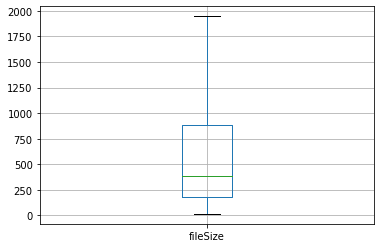

In [17]:
df.boxplot(['fileSize'], showfliers=False)

In [52]:
df['chunk_size'].describe()

count    10726.000000
mean        13.555379
std         58.866576
min          2.000000
25%          4.000000
50%          6.000000
75%         11.000000
max       2545.000000
Name: chunk_size, dtype: float64

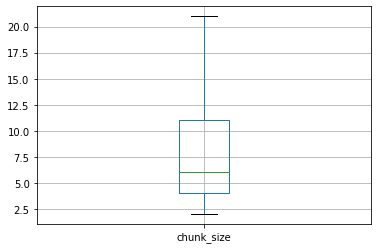

In [53]:
df.boxplot(['chunk_size'], showfliers=False)

## RQ3. What is the distribution in size of conflicting chunks resolutions as measured in lines of code (LOC)?

In [50]:
df['resolution_size'].describe()

count    10726.000000
mean         8.379079
std         35.503146
min          1.000000
25%          2.000000
50%          3.000000
75%          7.000000
max       1557.000000
Name: resolution_size, dtype: float64

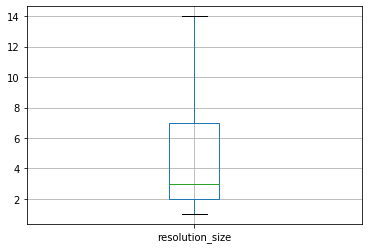

In [22]:
df.boxplot(['resolution_size'], showfliers=False)

## RQ1. What is the distribution in number of conflicting chunks and conflicting files for merge failures?

In [24]:
df_merges = pd.read_csv('data/merge_stats.csv')
print(len(df_merges))
df_merges.head()

5360


,sha,chunks,files
0,346418c4ef7b9a21dc659af43ff614d5db2343f9,137,129
1,70a4e7915b9e70ffc6adeab0bca620339e97673c,80,24
2,cdaaddf88b9ab1dda6b5bf859b38bca6055b057b,71,11
3,b013a74c44b526ba9f824cc7eb2087714d9b6eaf,65,1
4,ab780c16ee9d29b98ea6e240c21076d2f1ae6079,62,38


In [48]:
df_merges['chunks'].describe()

count    5360.000000
mean        2.001119
std         3.501392
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       137.000000
Name: chunks, dtype: float64

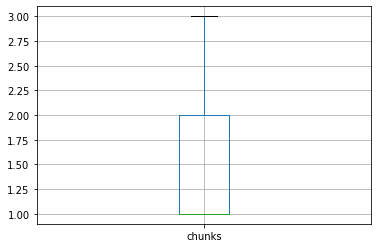

In [27]:
df_merges.boxplot('chunks', showfliers=False)

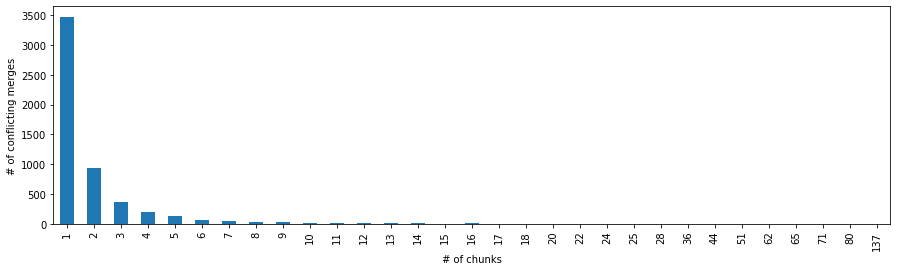

In [46]:
data = []
max_chunks = df_merges['chunks'].max()
for chunks_amount in range(1, max_chunks+1):
    merges_count = len(df_merges[df_merges['chunks'] == chunks_amount])
    if merges_count > 0:
        data.append([chunks_amount, merges_count])

df_plot = pd.DataFrame(data, columns=['chunks','merges'])
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='chunks', y='merges', ax=ax, legend=False)
ax.set_xlabel("# of chunks")
ax.set_ylabel("# of conflicting merges")
plt.show()

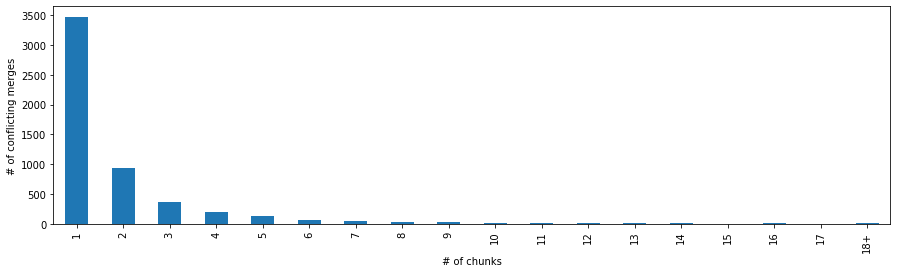

In [45]:
data = []
max_chunks = df_merges['chunks'].max()
more_than_18 = 0
for chunks_amount in range(1, max_chunks+1):
    merges_count = len(df_merges[df_merges['chunks'] == chunks_amount])
    if merges_count > 0:
        if chunks_amount >= 18:
            more_than_18+=chunks_count
        else:
            data.append([chunks_amount, merges_count])
data.append(['18+', more_than_18]) 

df_plot = pd.DataFrame(data, columns=['chunks','merges'])
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='chunks', y='merges', ax=ax, legend=False)
ax.set_xlabel("# of chunks")
ax.set_ylabel("# of conflicting merges")
plt.show()

In [49]:
df_merges['files'].describe()

count    5360.000000
mean        1.640112
std         2.491515
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       129.000000
Name: files, dtype: float64

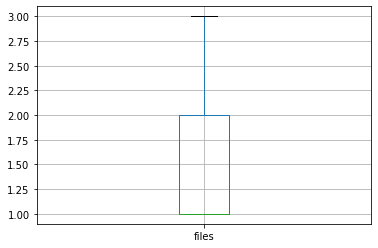

In [44]:
df_merges.boxplot('files', showfliers=False)

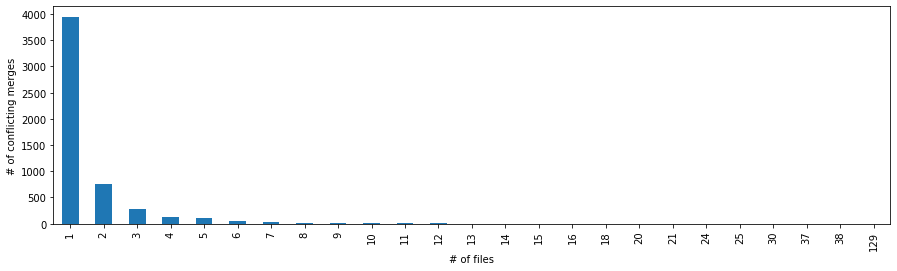

In [47]:
data = []
max_files = df_merges['files'].max()
for files_count in range(1, max_files+1):
    merges_count = len(df_merges[df_merges['files'] == files_count])
    if merges_count > 0:
        data.append([files_count, merges_count])

df_plot = pd.DataFrame(data, columns=['files_count','merges'])
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
df_plot.plot(kind='bar', x='files_count', y='merges', ax=ax, legend=False)
ax.set_xlabel("# of files")
ax.set_ylabel("# of conflicting merges")
plt.show()